<a href="https://colab.research.google.com/github/neerajsudheer/DA-Project_ChronicKidneyDisease/blob/main/Chronic_kidney_discease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats

In [16]:
from google.colab import files
uploaded = files.upload()


Saving kidney_disease.csv to kidney_disease (1).csv


In [17]:
import io
df = pd.read_csv(io.BytesIO(uploaded['kidney_disease.csv']))
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [19]:
df.describe(include='all')

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,248,335,396,396,...,330,295,270,398,398,398,399,399,399,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,...,44,92,46,2,5,3,2,2,2,3
top,NaN,NaN,NaN,NaN,NaN,NaN,normal,normal,notpresent,notpresent,...,41,9800,5.2,no,no,no,good,no,no,ckd
freq,NaN,NaN,NaN,NaN,NaN,NaN,201,259,354,374,...,21,11,18,251,258,362,317,323,339,248
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**NUMBER OF ROWS AND COLUMNS IN THE DATASET**

In [20]:
rows = len(df.axes[0])
cols = len(df.axes[1])
 
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

Number of Rows:  400
Number of Columns:  26


In [21]:
df = df.drop_duplicates(keep=False)   
df.shape

(400, 26)

*The above result implies there are no duplicates is the dataset*

**DETECTING NUMBER OF MISSING OR NULL VALUES**

In [22]:
df.isna().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [23]:
 
df.shape

(400, 26)

**DETECTING NUMBER OF OUTLIERS IN EACH COLUMN**

In [24]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.


age               10
al                 0
ane                0
appet              0
ba                 0
bgr               34
bp                36
bu                38
cad                0
classification     0
dm                 0
hemo               1
htn                0
id                 0
pc                 0
pcc                0
pcv                0
pe                 0
pot                4
rbc                0
rc                 0
sc                51
sg                 0
sod               16
su                61
wc                 0
dtype: int64

In [25]:
corr=df.corr(method='kendall')
corr.style.background_gradient(cmap='RdBu_r')

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
id,1.000000,-0.150538,-0.183460,0.492095,-0.461904,-0.241658,-0.241700,-0.227156,-0.416618,0.334661,-0.020789,0.468660
age,-0.150538,1.000000,0.091041,-0.175028,0.162022,0.226308,0.210285,0.207367,0.247029,-0.092651,0.050822,-0.149497
bp,-0.183460,0.091041,1.000000,-0.166320,0.166703,0.189427,0.131430,0.135261,0.228107,-0.105623,0.069924,-0.203553
sg,0.492095,-0.175028,-0.166320,1.000000,-0.435006,-0.293116,-0.285263,-0.253997,-0.428244,0.333072,0.048181,0.475692
al,-0.461904,0.162022,0.166703,-0.435006,1.000000,0.319504,0.286725,0.382006,0.512102,-0.426574,0.039979,-0.535335
su,-0.241658,0.226308,0.189427,-0.293116,0.319504,1.000000,0.489264,0.177879,0.286143,-0.187724,0.043487,-0.233709
bgr,-0.241700,0.210285,0.131430,-0.285263,0.286725,0.489264,1.000000,0.130601,0.248635,-0.183536,0.049796,-0.237922
bu,-0.227156,0.207367,0.135261,-0.253997,0.382006,0.177879,0.130601,1.000000,0.536078,-0.289984,0.149349,-0.412563
sc,-0.416618,0.247029,0.228107,-0.428244,0.512102,0.286143,0.248635,0.536078,1.000000,-0.361957,0.091614,-0.526904
sod,0.334661,-0.092651,-0.105623,0.333072,-0.426574,-0.187724,-0.183536,-0.289984,-0.361957,1.000000,0.016244,0.357230


*from the above correlation plot it can be inferred that there is significant amount of corelation between su and al columns and (sc,al) columns(attributes)*

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  

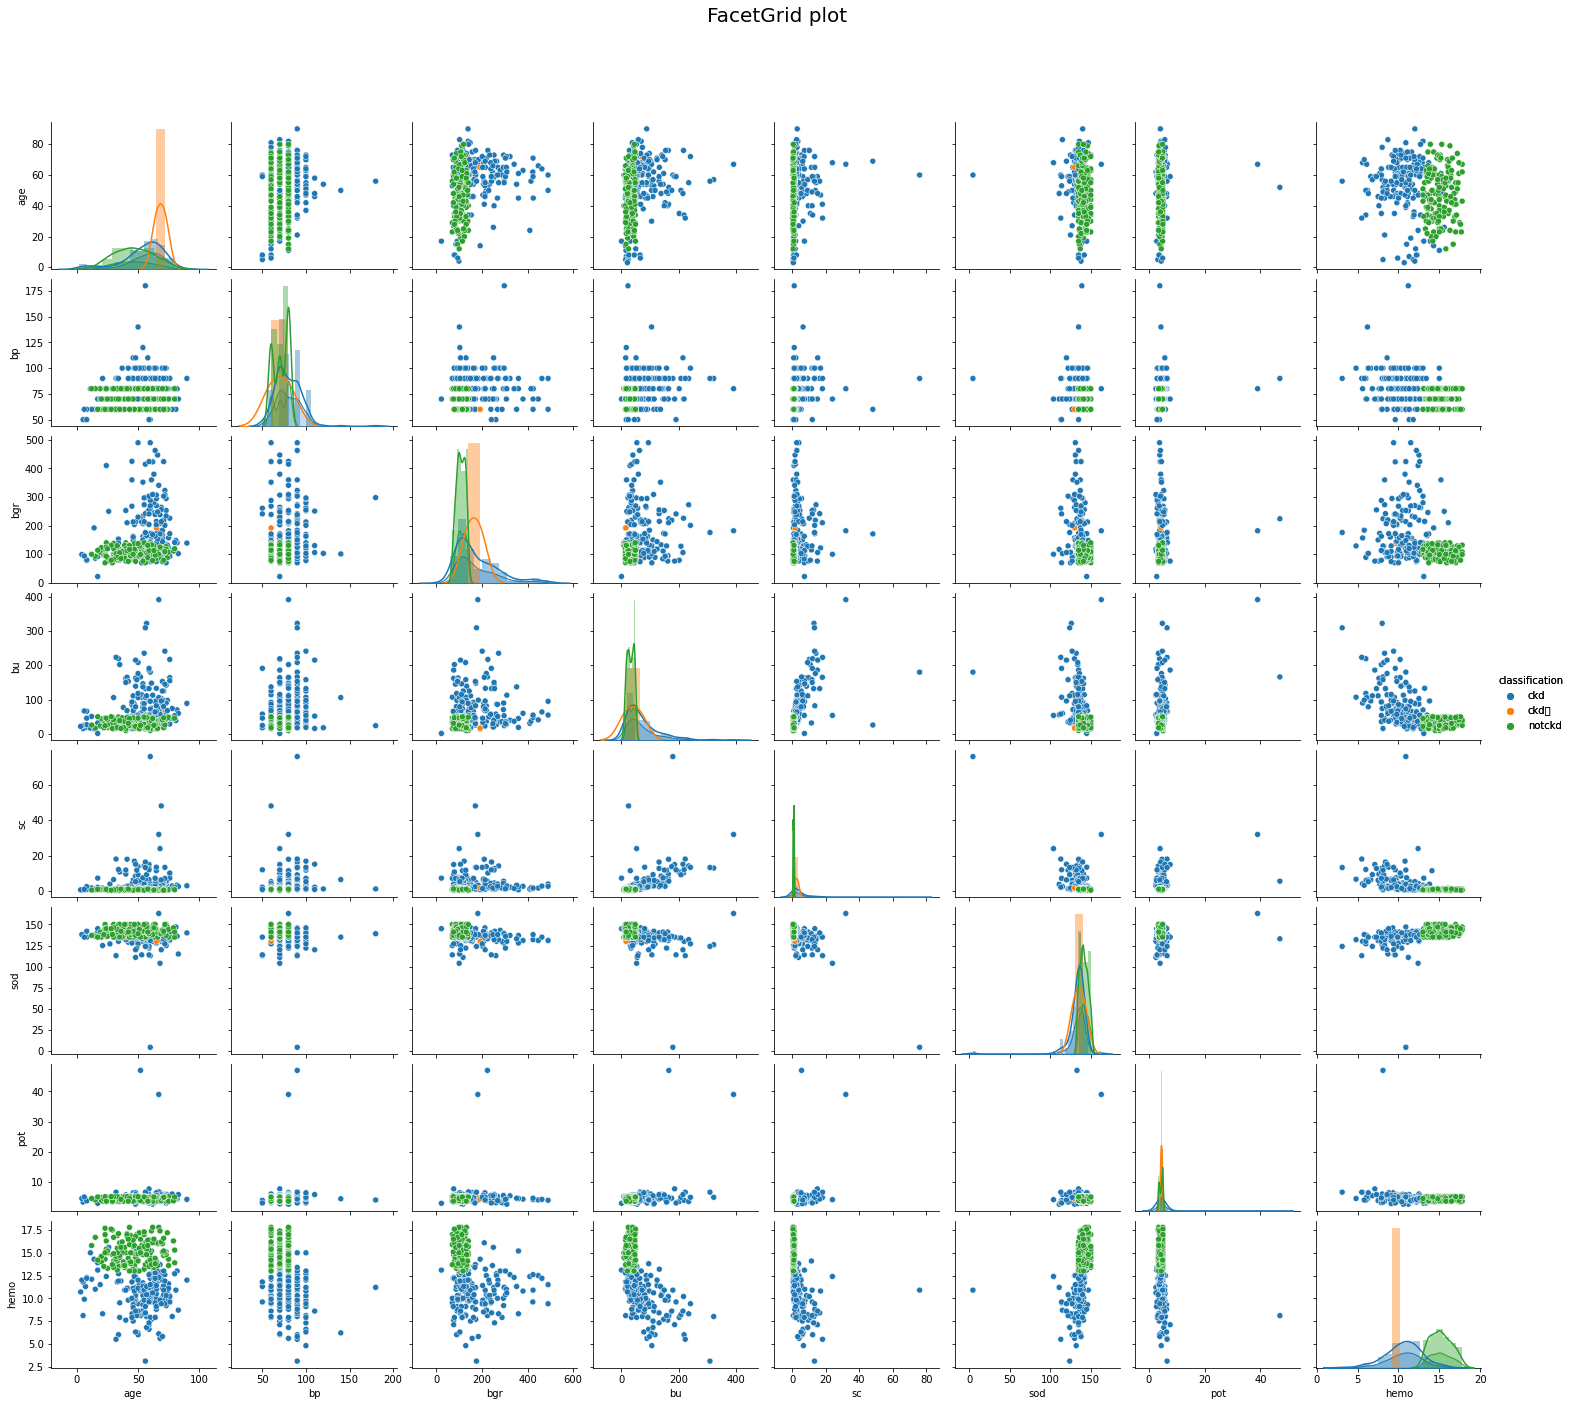

In [31]:
g = sns.pairplot(df, vars =['age', 'bp','bgr', 'bu', 'sc','sod', 'pot', 'hemo'],hue = 'classification')
g.map_diag(sns.distplot)
g.add_legend()
g.fig.suptitle('FacetGrid plot', fontsize = 20)
g.fig.subplots_adjust(top= 0.9);